In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../Data/rating.csv'
df=pd.read_csv(path)



In [3]:
df

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58351,781108,NaN,The Indian Express,PTI,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,https://indianexpress.com/article/cities/banga...,https://images.indianexpress.com/2023/11/DK-Sh...,2023-11-29 10:57:22,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,Neutral
58352,781129,NaN,Forbes,"Tom Sanderson, Senior Contributor, \n Tom Sand...",FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,https://www.forbes.com/sites/tomsanderson/2023...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 08:41:18,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,Neutral
58353,781235,NaN,NPR,Brigid McCarthy,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",https://www.npr.org/2023/11/29/1215016001/heal...,https://media.npr.org/assets/img/2023/11/23/sa...,2023-11-29 10:01:12,The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,Negative
58354,781240,NaN,Forbes,"Gary Stern, Contributor, \n Gary Stern, Contri...",Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",https://www.forbes.com/sites/garystern/2023/11...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 13:44:33,Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,Neutral


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       58356 non-null  int64 
 1   source_id        17771 non-null  object
 2   source_name      58356 non-null  object
 3   author           56193 non-null  object
 4   title            58356 non-null  object
 5   description      58346 non-null  object
 6   url              58356 non-null  object
 7   url_to_image     54905 non-null  object
 8   published_at     58356 non-null  object
 9   content          58356 non-null  object
 10  category         58335 non-null  object
 11  article          58356 non-null  object
 12  title_sentiment  58356 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.8+ MB


In [5]:
shape_of_df = df.shape
print("Shape of the DataFrame: ", shape_of_df)

Shape of the DataFrame:  (58356, 13)


In [6]:
# null values in column

null_values_per_column = df.isnull().sum()
total_rows = df.shape[0]

# Calculate percentage of null values for each column
null_percentage_per_column = (null_values_per_column / total_rows) * 100

# Combine null values count and percentage into a DataFrame
null_summary = pd.DataFrame({'Null Values': null_values_per_column, 'Null Percentage': null_percentage_per_column})

print("Null values in each column:")
print(null_summary)


Null values in each column:
                 Null Values  Null Percentage
article_id                 0         0.000000
source_id              40585        69.547262
source_name                0         0.000000
author                  2163         3.706560
title                      0         0.000000
description               10         0.017136
url                        0         0.000000
url_to_image            3451         5.913702
published_at               0         0.000000
content                    0         0.000000
category                  21         0.035986
article                    0         0.000000
title_sentiment            0         0.000000


In [7]:
# Statistical analysis for numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_stats = df[numeric_columns].describe()

# Statistical analysis for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_stats = df[categorical_columns].describe(include='all')

# Print statistical analysis results
print("Statistical analysis for numeric columns:")
print(numeric_stats)
print("\nStatistical analysis for categorical columns:")
categorical_stats


Statistical analysis for numeric columns:
          article_id
count   58356.000000
mean   298958.734492
std    216023.477569
min       418.000000
25%    121776.500000
50%    251651.000000
75%    451541.500000
max    781308.000000

Statistical analysis for categorical columns:


,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
count,17771,58356,56193,58356,58346,58356,54905,58356,58356,58335,58356,58356
unique,10,29,7553,53454,53165,54583,34903,41387,52174,256,54148,3
top,the-times-of-india,ETF Daily News,MarketBeat News,Morning news brief,No description,https://www.ibtimes.com/uk-bans-recreational-u...,https://ml.globenewswire.com/Resource/Download...,2023-11-08 10:05:18,"Rashmika Mandanna shines in ethnic wear, inspi...",Stock,Liite,Neutral
freq,7504,16746,16742,12,610,2,645,122,129,3687,9,42926


 ## Missing values pattern
Understanding the characteristics of the original data helps to grasp the nature of the information.
Identifying patterns, outliers, and distributions in the raw data can guide your cleaning process.

In [8]:
# Task 1: Count of Missing Values
missing_values_count = df.isnull().sum()
print("Count of missing values in each column:")
print(missing_values_count)
print()

Count of missing values in each column:
article_id             0
source_id          40585
source_name            0
author              2163
title                  0
description           10
url                    0
url_to_image        3451
published_at           0
content                0
category              21
article                0
title_sentiment        0
dtype: int64



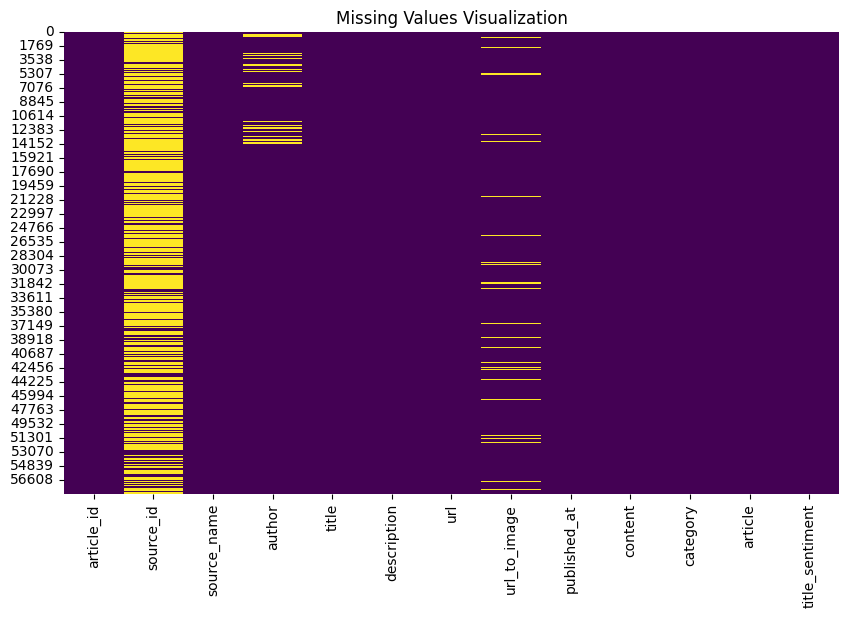

In [9]:
# Task 2: Missing Data Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Visualization')
plt.show()


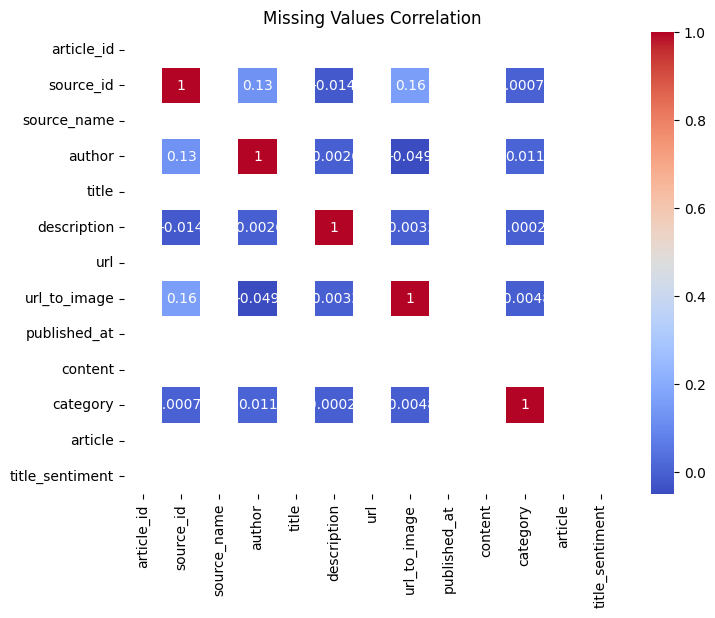

In [10]:
# Task 4: Missingness Correlation
missing_corr = df.isnull().corr()
plt.figure(figsize=(8, 6))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm')
plt.title('Missing Values Correlation')
plt.show()